In [ ]:
in_colab = False
try:
    import google.colab
    in_colab = True
except:
    in_colab = False
in_colab

True

In [ ]:
if in_colab:
  !pip install neurokit2
  !pip install torchinfo
  !pip install pytorch_lightning
  !pip install wfdb
  !pip install pycwt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import torch
from torch import optim, nn
from IPython.display import clear_output
from torchinfo import summary
import os
import pywt as pw
from math import ceil
import cv2
from matplotlib import cm
from matplotlib import rcParams
import pytorch_lightning as pl
import imageio
import gc
import collections
from pytorch_lightning.loggers import Logger
from pytorch_lightning.loggers.logger import rank_zero_experiment
from pytorch_lightning.utilities import rank_zero_only
import scipy
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import ast
import os
import warnings
import numpy as np
from torch.utils.data import DataLoader, Dataset
import cv2 as cv

gc.collect()
with torch.no_grad():
    torch.cuda.empty_cache()

warnings.simplefilter(action='ignore', category=FutureWarning)
rcParams['font.weight'] = 'bold'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
if in_colab:
  from google.colab import drive
  drive.mount("/content/drive/", force_remount = True)
  %cd "drive/MyDrive/Colab Notebooks/ECG_SuperResolution"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/ECG_SuperResolution


In [ ]:
if in_colab:
    !ls
else:
    !dir

 activationmap_superresolution_labelCD_ch0-1_noised.png
 activationmap_superresolution_labelCD_nonoise.png
 activationmap_superresolution_labelCD.png
 activationmap_superresolution_labelHYP_ch0-1_noised.png
 activationmap_superresolution_labelHYP_nonoise.png
 activationmap_superresolution_labelHYP.png
 activationmap_superresolution_labelMI_ch0-1_noised.png
 activationmap_superresolution_labelMI_nonoise.png
 activationmap_superresolution_labelMI.png
 activationmap_superresolution_labelNORM_ch0-1_noised.png
'activationmap_superresolution_labelNORM_idx10_noiseEDA artifact.png'
'activationmap_superresolution_labelNORM_idx10_noiseEMG artifact.png'
 activationmap_superresolution_labelNORM_idx10_noiseNO.png
'activationmap_superresolution_labelNORM_idx10_noiseRespiration Noise.png'
 activationmap_superresolution_labelNORM_nonoise.png
 activationmap_superresolution_labelNORM.png
 activationmap_superresolution_labelSTTC_ch0-1_noised.png
 activationmap_superresolution_labelSTTC_nonoise.png
 activ

In [ ]:
if in_colab:
  !pip install matplotlib==3.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from functions import *

In [ ]:
channels = ["I", "II", "III", "aVL", "aVR", "aVF", "V1", "V2", "V3", "V4", "V5", "V6" ]
channels_map = {idx: channel for idx, channel in enumerate(channels)}

In [ ]:
!python --version

Python 3.10.12


In [ ]:
torch.__version__

'2.2.1+cu121'

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
%matplotlib inline

In [ ]:
torch.set_float32_matmul_precision("medium")

In [ ]:
labels = list(map_superclass_rev.keys())


In [ ]:
fs_lr = 50
fs_hr = 500

In [ ]:
labels = map_superclass_rev.keys()
dict_windows_test_hr = {}
dict_windows_test_lr = {}
dict_windows_test_lr_n = {}

path = os.getcwd()+os.sep+"pt_data"+os.sep
for label in labels:

    if label == "All":
      continue

    filename = path + "test_{}_hr.pt".format(label)
    hr_data = torch.load(filename)
    dict_windows_test_hr[label] = hr_data

    filename = path + "test_{}_50.pt".format(label)
    lr_data = torch.load(filename)
    dict_windows_test_lr[label] = lr_data

    filename = path + "test_{}_noisy.pt".format(label)
    lr_data = torch.load(filename)
    dict_windows_test_lr_n[label] = lr_data

In [ ]:
dict_windows_test_lr_n.keys()

dict_keys(['CD', 'HYP', 'MI', 'NORM', 'STTC'])

In [ ]:
import os
cwd = os.getcwd()
sep = os.sep
cwd

In [ ]:
modelspath = cwd + sep + "models"
modelpath = modelspath + sep + "model_2_denoising_lrhr_v2.pt"
model1d = torch.load(modelpath).to(device)
model1d

VAE1d_SR_multimodal(
  (encoder): Encoder1d(
    (encoder): Sequential(
      (0): EncoderBlock1d(
        (conv1d_in): Conv1d(12, 12, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=False)
        (conv1d_out): Conv1d(12, 192, kernel_size=(3,), stride=(1,))
        (activation_out): Tanh()
        (dropout_out): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderBlock1d(
        (conv1d_in): Conv1d(192, 384, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=False)
        (conv1d_out): Conv1d(384, 768, kernel_size=(3,), stride=(1,))
        (activation_out): Tanh()
        (dropout_out): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (decoder): Decoder1d(
    (decoder): Sequential(
      (0): DecoderBlock1d(
        (conv1d_in): ConvTranspose1d(768, 768, kernel_size=(3,), stride=(1,))
        (activation_in): Tanh()
        (dropout_in): Dropout(p=0.1, inplace=

In [ ]:
label = "MI"

In [ ]:
def delete_channel(data, nchs = 12, ch_to_delete = None):

  output = data.copy()

  if output.ndim == 3:
    output = torch.squeeze(output, dim = 0)

  if ch_to_delete is None:
    channels = np.arange(0, nchs, 1)
    ch_to_delete = choice(channels)

  n = output[ch_to_delete, :].shape[-1]
  output[ch_to_delete, :] = [0]*n
  return output, ch_to_delete

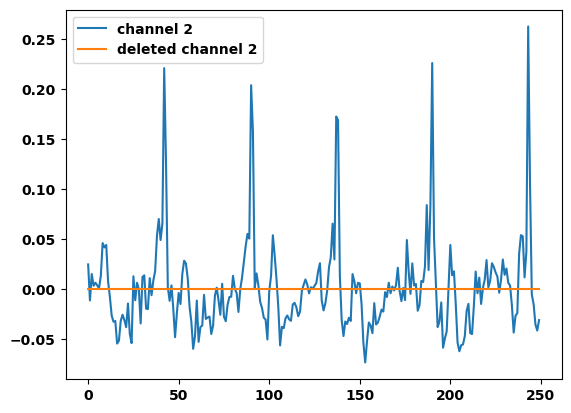

In [ ]:
from random import choice

idx = 0
lr_data = dict_windows_test_lr_n[label][idx]
if lr_data.ndim == 3:
    lr_data = torch.squeeze(lr_data, dim = 0).cpu().detach().numpy()

deleted_ch, ch_to_delete = delete_channel(lr_data, nchs = 12)
plt.plot(lr_data[ch_to_delete, :], label = "channel {}".format(ch_to_delete))
plt.plot(deleted_ch[ch_to_delete, :], label = "deleted channel {}".format(ch_to_delete))

plt.legend()

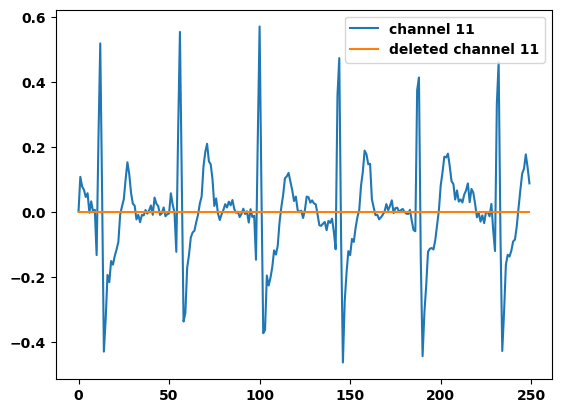

In [ ]:
from random import choice

idx = 50
lr_data = dict_windows_test_lr_n[label][idx]
if lr_data.ndim == 3:
    lr_data = torch.squeeze(lr_data, dim = 0).cpu().detach().numpy()

deleted_ch, ch_to_delete = delete_channel(lr_data, nchs = 12, ch_to_delete = 11)
plt.plot(lr_data[ch_to_delete, :], label = "channel {}".format(ch_to_delete))
plt.plot(deleted_ch[ch_to_delete, :], label = "deleted channel {}".format(ch_to_delete))

plt.legend()

In [ ]:
def preprocess(data, th = 0.2, nchs = 12, ch_to_delete = None):

  p = np.random.uniform()#min 0, max 1    deletion channel rate
  if p < th:
    #print("delete", p)
    output, ch_to_delete = delete_channel(data, nchs = nchs, ch_to_delete = ch_to_delete)
    return output, ch_to_delete
  else:
    #print("do not delete", p)
    return data, None

In [ ]:
import pandas as pd
columns = ["Missing Channel", "Min MSE", "Max MSE", "Mean MSE (+/- STD)"]
df = pd.DataFrame(columns = columns)
df

,Missing Channel,Min MSE,Max MSE,Mean MSE (+/- STD)


In [ ]:
nchs = 12
data_withoutchannel = {}

for ch in range(nchs):

  if ch not in data_withoutchannel.keys():
    data_withoutchannel[ch] = []

  print("\r", ch+1, "/", nchs, end = "")
  X_test_lr = dict_windows_test_lr_n[label]
  print("\n")

  n = len(X_test_lr)
  datas = []
  for j, data in enumerate(X_test_lr):
    print("\r", j+1, "/", n, end = "")
    if data.ndim == 3:
      data = torch.squeeze(data, dim = 0)
    data = data.cpu().detach().numpy()
    data, ch_to_delete = preprocess(data, th = 0.2, nchs = nchs, ch_to_delete = ch)
    datas.append(torch.from_numpy(data))
  datas = torch.stack(datas)
  data_withoutchannel[ch] = datas

 1 / 12

 2 / 12

 3 / 12

 4 / 12

 5 / 12

 6 / 12

 7 / 12

 8 / 12

 9 / 12

 10 / 12

 11 / 12

 12 / 12

 1088 / 1088

In [ ]:
def validate_single_channel(testing_data, dict_windows_test_hr, label, model, channel = None):

    super_resolution_windows = []

    device = "cuda:0"
    model = model.to(device)
    model.eval()

    testing_data_hr = dict_windows_test_hr[label]
    for i, window in enumerate(testing_data):
        print("\r", "{}/{}".format(i+1, len(testing_data)), end="")
        if channel is not None:
            window = window[:, channel, :]
        window = torch.unsqueeze(window, dim = 0).to(device)
        pred = model([window, None, None, None])
        sr_data = pred[1]
        hr_data = testing_data_hr[i]
        if channel is not None:
            hr_data = hr_data[:, channel, :]
        sr_data = torch.unsqueeze(sr_data, dim = 0)
        super_resolution_windows.append(sr_data.to(device))
    loss, losses = check_super_resolution_quality(testing_data_hr, super_resolution_windows)
    #super_resolution_windows = [window.to("cpu") for window in super_resolution_windows]
    return loss, losses, super_resolution_windows

In [ ]:
model1d.eval()

for ch, data_lr in data_withoutchannel.items():

  print("\r", ch, "/", nchs, end = "")
  print("\n")

  for j, block in enumerate(model1d.decoder.decoder):
    if j+1 == 2:
      block.last_tanh = False
    else:
      block.last_tanh = True
  for j, block in enumerate(model1d.upsample.decoder):
    if j+1 == 2:
      block.last_tanh = False
    else:
      block.last_tanh = True

  loss, losses, sr_windows = validate_single_channel(data_lr, dict_windows_test_hr, label, model1d, channel = None)
  min_ = round(np.min(losses), 5)
  max_ = round(np.max(losses), 5)
  mean_ = round(np.mean(losses), 5)
  std_ = round(np.std(losses), 5)
  values = [channels_map[ch], min_, max_, "{}(+/-){}".format(mean_, std_)]
  df.loc[ch] = values
  del sr_windows

 0 / 12

 1 / 12

 2 / 12

 3 / 12

 4 / 12

 5 / 12

 6 / 12

 7 / 12

 8 / 12

 9 / 12

 10 / 12

 11 / 12



In [ ]:
df.set_index("Missing Channel", inplace=True)
df

,Min MSE,Max MSE,Mean MSE (+/- STD)
Missing Channel,,,
I,0.00044,0.13584,0.00752(+/-)0.01407
II,0.00049,0.10501,0.00509(+/-)0.00719
III,0.00044,0.11793,0.00605(+/-)0.01011
aVL,0.00049,0.14760,0.00793(+/-)0.01555
aVR,0.00044,0.08788,0.00629(+/-)0.01062
aVF,0.00044,0.08788,0.00563(+/-)0.00827
V1,0.00044,0.08788,0.00513(+/-)0.00721
V2,0.00044,0.15302,0.00624(+/-)0.01023
V3,0.00044,0.12419,0.00732(+/-)0.01304


In [ ]:
columns = ["Missing Channel", "Min MSE", "Max MSE", "Mean MSE (+/- STD)"]
df2 = pd.DataFrame(columns = columns)
df2.loc[0] = ["No Channel Missing", "0.0004",	"0.0879",	"0.0040 (+/-)0.0060"]
df2.set_index("Missing Channel", inplace = True)
df2

,Min MSE,Max MSE,Mean MSE (+/- STD)
Missing Channel,,,
No Channel Missing,0.00041,0.1198,0.0058(+/-)0.0099


In [ ]:
df_final = pd.concat([df, df2])
df_final

,Min MSE,Max MSE,Mean MSE (+/- STD)
Missing Channel,,,
I,0.00044,0.13584,0.00752(+/-)0.01407
II,0.00049,0.10501,0.00509(+/-)0.00719
III,0.00044,0.11793,0.00605(+/-)0.01011
aVL,0.00049,0.1476,0.00793(+/-)0.01555
aVR,0.00044,0.08788,0.00629(+/-)0.01062
aVF,0.00044,0.08788,0.00563(+/-)0.00827
V1,0.00044,0.08788,0.00513(+/-)0.00721
V2,0.00044,0.15302,0.00624(+/-)0.01023
V3,0.00044,0.12419,0.00732(+/-)0.01304


In [ ]:
results_path = cwd+sep+"results"+sep
results_path

'/content/drive/MyDrive/Colab Notebooks/ECG_SuperResolution/results/'

In [ ]:
df_final.to_csv(results_path+"sr_missingSingleChannel_experiment_p{}.csv".format(0.2))

In [ ]:
ref = df_final[df_final.index == "No Channel Missing"]["Mean MSE (+/- STD)"].values[0]
mean_ref, var_ref = ref.split("(+/-)")
mean_ref = float(mean_ref)
var_ref = float(var_ref)

diff = {}
for ch in channels:
  value = df_final[df_final.index == ch]["Mean MSE (+/- STD)"].values[0]
  mean, var = value.split("(+/-)")
  mean = float(mean)
  var = float(var)
  difference = mean_ref - mean
  diff[ch] = difference

In [ ]:
sorted_chs = sorted(diff.items(), key=lambda x:x[1])
sorted_chs = [items[0] for items in sorted_chs]
sorted_chs

['aVL', 'I', 'V3', 'aVR', 'V2', 'V5', 'III', 'aVF', 'V4', 'V1', 'II', 'V6']

In [ ]:
posivite_ifdeleted = []
negative_ifdeleted = []
nochanges = []
for ch, difference in diff.items():
  if difference > 0:
    posivite_ifdeleted.append(ch)
  elif difference < 0:
    negative_ifdeleted.append(ch)
  else:
    nochanges.append(ch)

In [ ]:
posivite_ifdeleted, negative_ifdeleted, nochanges

(['II', 'aVF', 'V1', 'V4', 'V6'],
 ['I', 'III', 'aVL', 'aVR', 'V2', 'V3', 'V5'],
 [])

#Multi channel deletion Experiment

In [ ]:
columns = ["Number of Deleted Channels", "Min MSE", "Max MSE", "Mean MSE (+/- STD)"]
df_multi = pd.DataFrame(columns = columns)
df_multi.loc[0] = ["0", "0.0004",	"0.0879",	"0.0040 (+/-)0.0060"]
df_multi

,Number of Deleted Channels,Min MSE,Max MSE,Mean MSE (+/- STD)
0,0,0.00041,0.1198,0.0058(+/-)0.0099


In [ ]:
map_channels_rev = {value: key for key, value in channels_map.items()}
map_channels_rev

{'I': 0,
 'II': 1,
 'III': 2,
 'aVL': 3,
 'aVR': 4,
 'aVF': 5,
 'V1': 6,
 'V2': 7,
 'V3': 8,
 'V4': 9,
 'V5': 10,
 'V6': 11}

In [ ]:
sorted_chs

['aVL', 'I', 'V3', 'aVR', 'V2', 'V5', 'III', 'aVF', 'V4', 'V1', 'II', 'V6']

In [ ]:
data_withoutchannels = {}
th = 0.2
nchs = 12

X_test_lr = dict_windows_test_lr_n[label]
n = len(X_test_lr)
#datas = []
for j, data in enumerate(X_test_lr):
  print("\r", j+1, "/", n, end = "")
  if data.ndim == 3:
    data = torch.squeeze(data, dim = 0)
  data = data.cpu().detach().numpy()
  for i, ch in enumerate(sorted_chs):
    print("\r", ch, i+1, "/", 12, end = "")
    ch_idx = map_channels_rev[ch]
    if ch not in data_withoutchannels.keys():
      data_withoutchannels[ch] = []
    data, ch_to_delete = preprocess(data, th = th, nchs = nchs, ch_to_delete = ch_idx)
    data_withoutchannels[ch].append(data)

for key, l in data_withoutchannels.items():
  data_withoutchannels[key] = torch.from_numpy(np.array(l))

data_withoutchannels[key].shape

 V6 12 / 12

torch.Size([1088, 12, 250])

In [ ]:
data_withoutchannels.keys()

dict_keys(['aVL', 'I', 'V3', 'aVR', 'V2', 'V5', 'III', 'aVF', 'V4', 'V1', 'II', 'V6'])

In [ ]:
map_channels = {value: key for key, value in map_channels_rev.items()}
map_channels

{0: 'I',
 1: 'II',
 2: 'III',
 3: 'aVL',
 4: 'aVR',
 5: 'aVF',
 6: 'V1',
 7: 'V2',
 8: 'V3',
 9: 'V4',
 10: 'V5',
 11: 'V6'}

In [ ]:
ch = "aVL"
ch_idx = map_channels_rev[ch]
print(ch_idx)
data_withoutchannels[ch][:, ch_idx, 0].shape

3


torch.Size([1088])

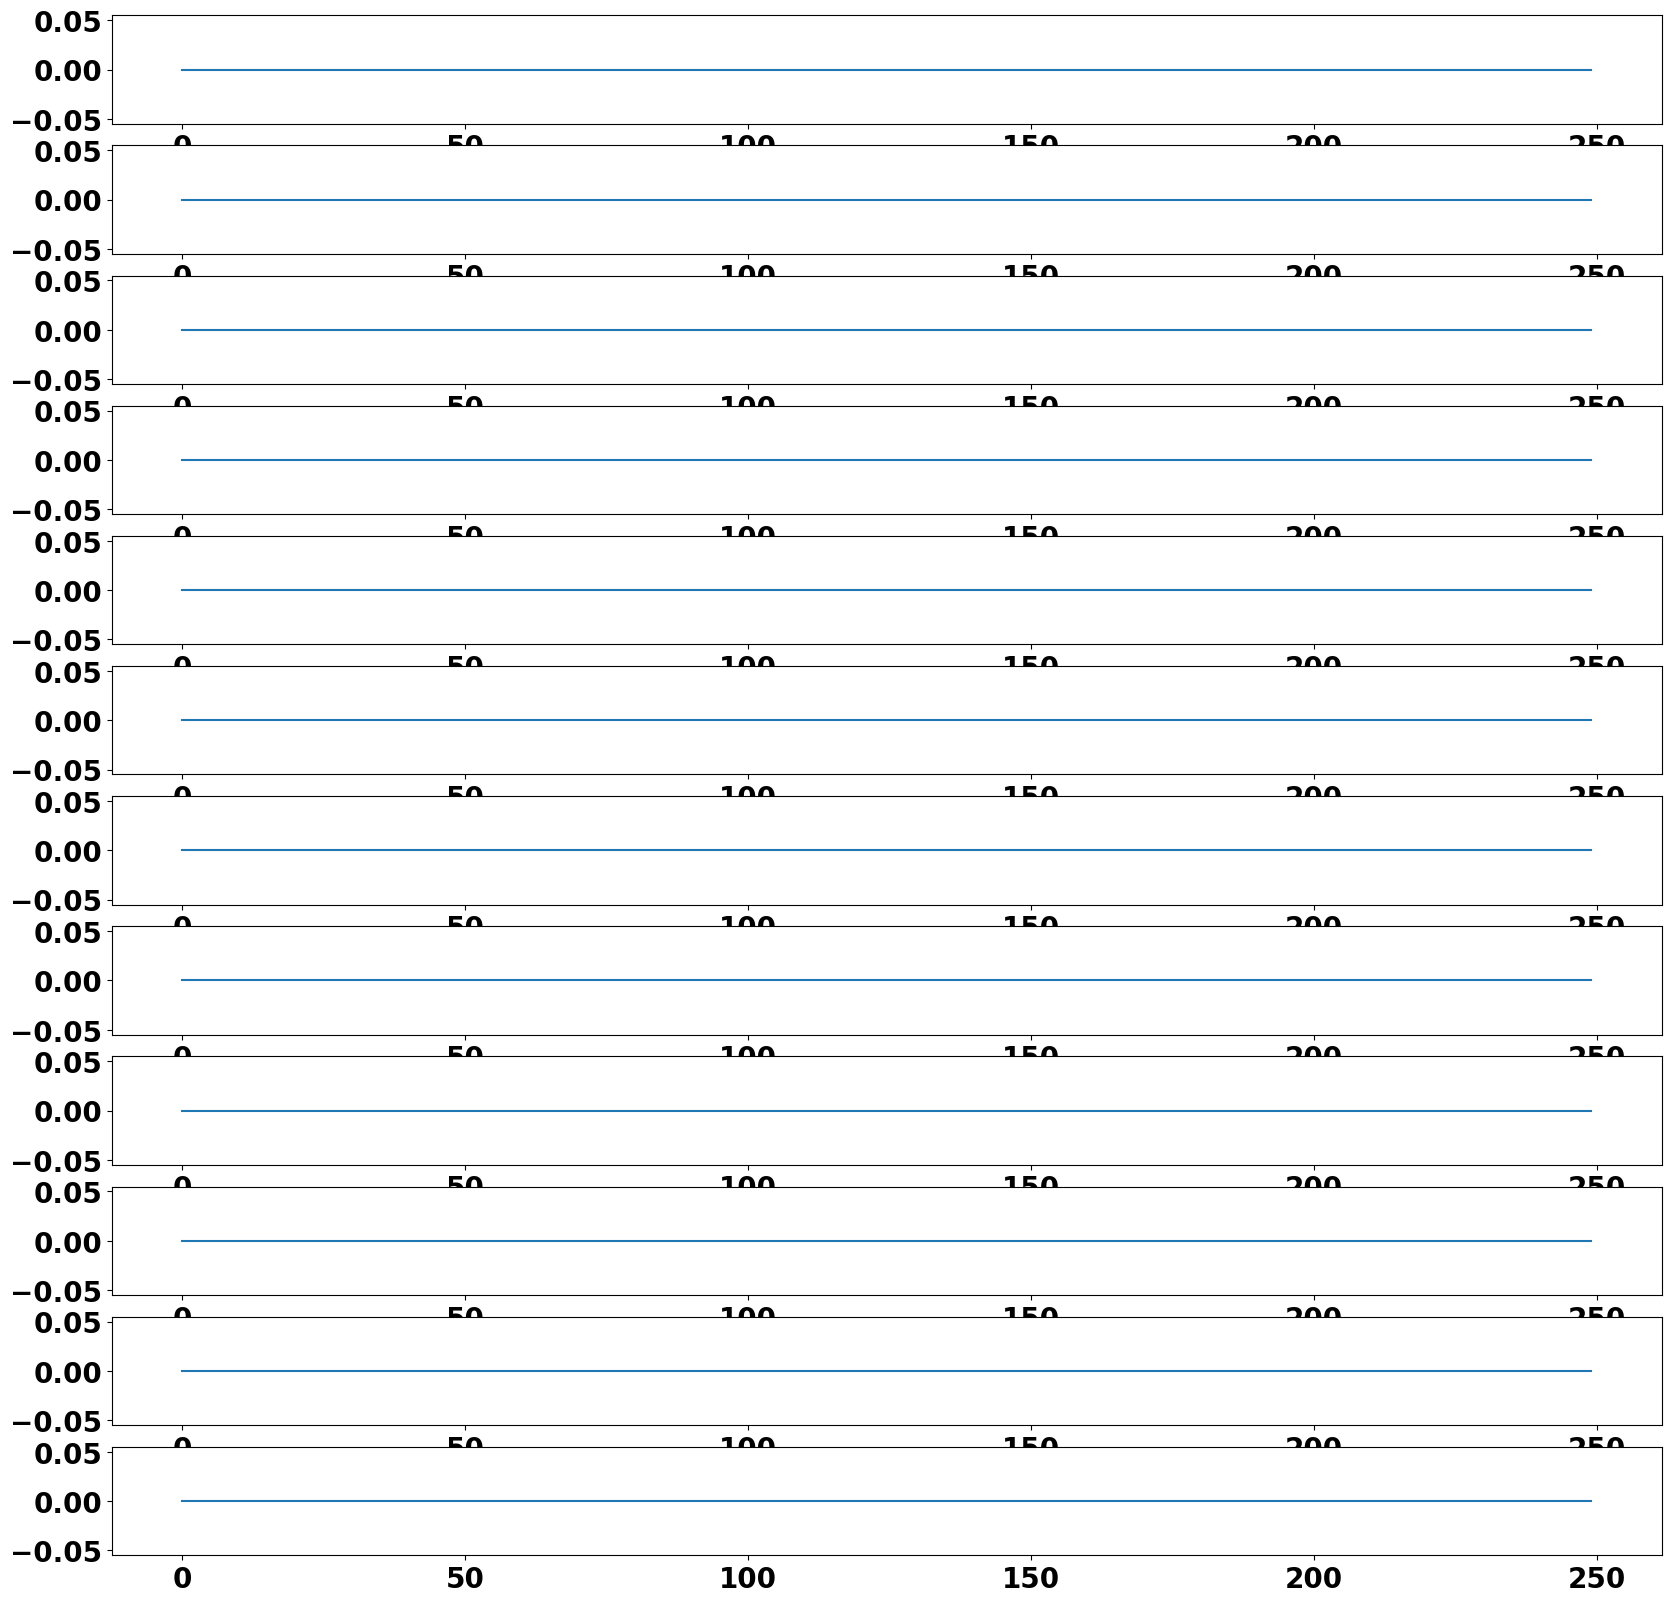

In [ ]:
ch = "aVL"
ch_idx = map_channels_rev[ch]
idx = torch.argwhere(data_withoutchannels[ch][:, ch_idx, 0] == 0.0)[0].item()
fig, axs = plt.subplots(nchs, 1, figsize=(20, 20))
for i in range(nchs):
  axs[i].plot(data_withoutchannels[ch][idx, ch_idx, :])

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
i = 1
for ch, data_lr in data_withoutchannels.items():

  print("\r", i, "/", nchs, end = "")
  loss, losses, sr_windows = validate_single_channel(data_lr, dict_windows_test_hr, label, model1d, channel = None)
  print(loss)
  print("\n")
  min_ = round(np.min(losses), 5)
  max_ = round(np.max(losses), 5)
  mean_ = round(np.mean(losses), 5)
  std_ = round(np.std(losses), 5)
  values = [i, min_, max_, "{}(+/-){}".format(mean_, std_)]
  df_multi.loc[i] = values
  i+=1
  del sr_windows

0.007601194089094112


0.01163030345512251


0.013568748646535182


0.015482290167496745


0.017818988013620102


0.01944998747699976


0.02035178562907865


0.02188180763524168


0.023058274226594434


0.023745426648554925


0.02455167612135804


0.02491102796022246




In [ ]:
df_multi.set_index("Number of Deleted Channels", inplace=True)
df_multi

,Min MSE,Max MSE,Mean MSE (+/- STD)
Number of Deleted Channels,,,
0,0.00041,0.1198,0.0058(+/-)0.0099
1,0.00049,0.09786,0.0076(+/-)0.01491
2,0.00049,0.19813,0.01163(+/-)0.02363
3,0.00049,0.19813,0.01357(+/-)0.02422
4,0.00049,0.19641,0.01548(+/-)0.02597
5,0.00049,0.20312,0.01782(+/-)0.02819
6,0.00049,0.23367,0.01945(+/-)0.0296
7,0.00049,0.23367,0.02035(+/-)0.02978
8,0.00049,0.23367,0.02188(+/-)0.03101


In [ ]:
df_multi.to_csv(results_path+"sr_missingMultipleChannels_experiment_p{}.csv".format(0.2))

#Single channel deletion experiments on deletion probability rate


In [ ]:
ps = np.arange(0.1, 1.0, 0.1)
ps

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
dfs = {}
for ch in sorted_chs:
  columns = ["Missing Rate of Channel {}".format(ch), "Min MSE", "Max MSE", "Mean MSE (+/- STD)"]
  dfs[ch] = pd.DataFrame(columns = columns)
  dfs[ch].loc[0] = ["0", "0.00041",	"0.1198",	"0.0058(+/-)0.0099"]

In [ ]:
dfs[ch]

,Missing Rate of Channel V6,Min MSE,Max MSE,Mean MSE (+/- STD)
0,0,0.00041,0.1198,0.0058(+/-)0.0099


In [ ]:
nchs = 12
data_withoutchannel_ps = {}

for i, ch in enumerate(sorted_chs):

  ch_idx = map_channels_rev[ch]
  if ch not in data_withoutchannel_ps.keys():
    data_withoutchannel_ps[ch] = {}

  print("\r", i+1, "/", nchs, end = "")
  X_test_lr = dict_windows_test_lr_n[label]
  n = len(X_test_lr)
  print("\n")

  for p in ps:
    if ch not in data_withoutchannel_ps[ch].keys():
      data_withoutchannel_ps[ch][p] = []

    datas = []
    for j, data in enumerate(X_test_lr):
      print("\r", j+1, "/", n, end = "")
      if data.ndim == 3:
        data = torch.squeeze(data, dim = 0)
      data = data.cpu().detach().numpy()
      data, ch_to_delete = preprocess(data, th = p, nchs = nchs, ch_to_delete = ch_idx)
      datas.append(torch.from_numpy(data))
    datas = torch.stack(datas)
    data_withoutchannel_ps[ch][p] = datas

 1 / 12

 2 / 12

 3 / 12

 4 / 12

 5 / 12

 6 / 12

 7 / 12

 8 / 12

 9 / 12

 10 / 12

 11 / 12

 12 / 12

 1088 / 1088

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:

from torch.nn import functional as F
def check_super_resolution_quality(not_resampled_data, super_resolution_data):

    mse_errors = []
    for i, data in enumerate(not_resampled_data):
        print(i+1, "/", len(not_resampled_data), end="\r")
        sr_data = super_resolution_data[i]
        error = F.mse_loss(data, sr_data)
        mse_errors.append(error.item())
        del error
    mean_mse = np.mean(mse_errors)
    return mean_mse, mse_errors

In [ ]:
for ch, datas in data_withoutchannel_ps.items():
  i = 1
  temp_df = dfs[ch]
  print("\r", ch, "/", nchs, end = "")
  for p, data_lr in datas.items():
    print("\n")
    loss, losses, sr_windows = validate_single_channel(data_lr, dict_windows_test_hr, label, model1d, channel = None)
    min_ = round(np.min(losses), 5)
    max_ = round(np.max(losses), 5)
    mean_ = round(np.mean(losses), 5)
    std_ = round(np.std(losses), 5)
    values = [p, min_, max_, "{}(+/-){}".format(mean_, std_)]
    temp_df.loc[i] = values
    i += 1
    del sr_windows

 aVL / 12

1088 / 1088

1088 / 1088





1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

 I / 12



1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

 V3 / 12

1088 / 1088



1088 / 1088

1088 / 1088









 aVR / 12



1088 / 1088

1088 / 1088

1088 / 1088





1088 / 1088

1088 / 1088

 V2 / 12

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

 V5 / 12



1088 / 1088



1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

 III / 12

1088 / 1088



1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

 aVF / 12

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088



1088 / 1088

1088 / 1088



 V4 / 12

1088 / 1088

1088 / 1088







1088 / 1088

1088 / 1088



 V1 / 12

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

1088 / 1088

 II / 12

1088 / 1088

1088 / 1088



1088 / 1088



1088 / 1088

1088 / 1088

In [ ]:
torch.cuda.empty_cache()

In [ ]:
for ch, temp_df in dfs.items():
  #temp_df.set_index("Missing Rate of Channel {}".format(ch), inplace=True)
  temp_df.index = np.round(temp_df.index.astype(float), 1)
  temp_df.to_csv(results_path+"sr_missingSingleChannel{}_differentPs.csv".format(ch))

In [ ]:
dfs["aVL"]

,Missing Rate of Channel aVL,Min MSE,Max MSE,Mean MSE (+/- STD)
0.0,0,0.00041,0.1198,0.0058(+/-)0.0099
1.0,0.1,0.00044,0.08788,0.00629(+/-)0.01254
2.0,0.2,0.00049,0.08788,0.00838(+/-)0.0161
3.0,0.3,0.00044,0.10527,0.0101(+/-)0.01854
4.0,0.4,0.00044,0.09236,0.01209(+/-)0.02048
5.0,0.5,0.00044,0.1476,0.01286(+/-)0.02124
6.0,0.6,0.00049,0.09786,0.01531(+/-)0.02313
7.0,0.7,0.00049,0.1476,0.01711(+/-)0.02463
8.0,0.8,0.00049,0.1476,0.02019(+/-)0.02655
9.0,0.9,0.00044,0.1476,0.02112(+/-)0.02656
